<a href="https://colab.research.google.com/github/Aingsopheak/GIC-library-Vue/blob/master/AIproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/sample_data/fifa_players.csv')
i= ['age', 'overall_rating' ]
data = df[i]
print(data.shape)       # Check the dimensions of the dataset
print(data.head())      # Display the first few rows of the dataset
print(data.columns)     # Print the column names

(17954, 2)
   age  overall_rating
0   31              94
1   27              88
2   25              88
3   27              88
4   27              88
Index(['age', 'overall_rating'], dtype='object')


In [ ]:
data.describe()

,age,overall_rating
count,17954.000000,17954.000000
mean,25.565445,66.240169
std,4.705708,6.963730
min,17.000000,47.000000
25%,22.000000,62.000000
50%,25.000000,66.000000
75%,29.000000,71.000000
max,46.000000,94.000000


In [ ]:
data.corr()

,age,overall_rating
age,1.000000,0.461529
overall_rating,0.461529,1.000000


<ipython-input-111-801a8e37db18>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


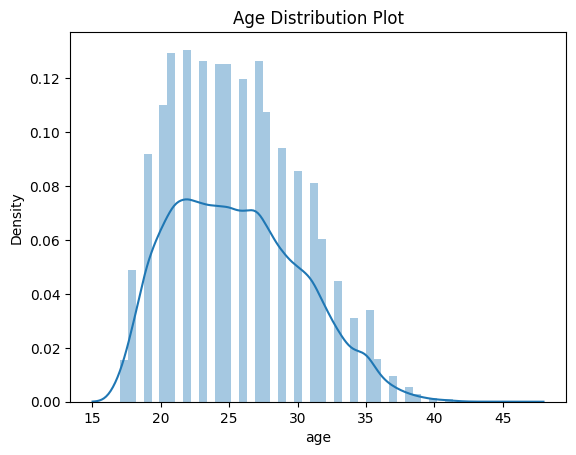

In [ ]:
import seaborn as sns
plt.title('Age Distribution Plot')
sns.distplot(data['age'])
plt.show()

<ipython-input-112-4acbac8ae576>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['overall_rating'])


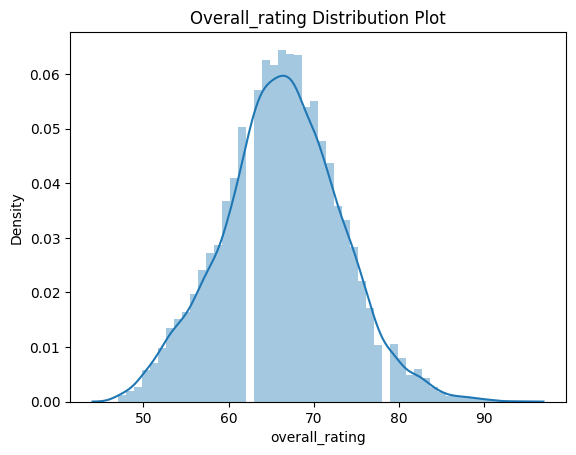

In [ ]:
plt.title('Overall_rating Distribution Plot')
sns.distplot(data['overall_rating'])
plt.show()

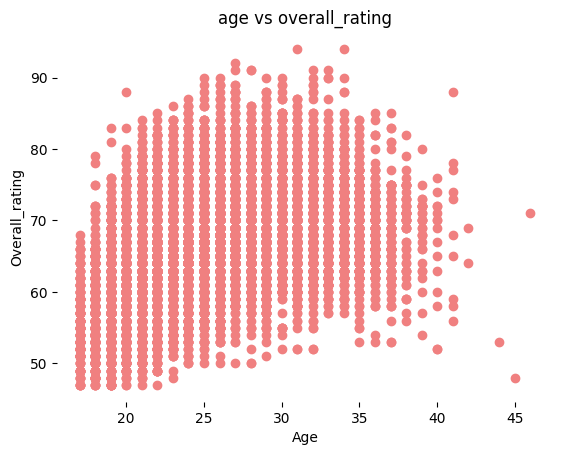

In [ ]:
plt.scatter(data['age'], data['overall_rating'], color = 'lightcoral')
plt.title('age vs overall_rating')
plt.xlabel('Age')
plt.ylabel('Overall_rating')
plt.box(False)
plt.show()

In [ ]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

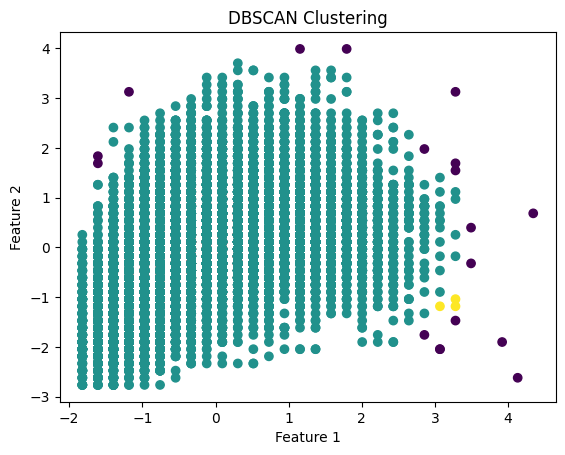

In [ ]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
unique_labels = set(clusters)
print(f"Unique Cluster Labels: {unique_labels}")

Unique Cluster Labels: {0, 1, -1}


In [ ]:


# Count the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Generate the report
report = f"DBSCAN Clustering Report\n\n"
report += f"Number of clusters: {n_clusters}\n"
report += f"Number of noise points: {n_noise}\n\n"

# Calculate and report the percentage of points in each cluster
unique_labels, label_counts = np.unique(clusters, return_counts=True)
total_points = len(clusters)
for label, count in zip(unique_labels, label_counts):
    if label == -1:
        label_name = "Noise"
    else:
        label_name = f"Cluster {label}"
    percentage = (count / total_points) * 100
    report += f"{label_name}: {count} points ({percentage:.2f}%)\n"

# Print the report
print(report)

DBSCAN Clustering Report

Number of clusters: 2
Number of noise points: 18

Noise: 18 points (0.10%)
Cluster 0: 17933 points (99.88%)
Cluster 1: 3 points (0.02%)

